In [169]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import get_cmap
from readGCMs import read_var_mod
import calendar
from global_land_mask import globe

In [170]:
modname = ['CESM2','CNRM-CM6-1', 'CanESM5','CESM2-WACCM','E3SM-1-0',
           'HadGEM3-GC31-LL','IPSL-CM6A-LR','NorESM2-LM', 'SAM0-UNICON',
           'ACCESS-CM2','ACCESS-ESM1-5','CNRM-ESM2-1','EC-Earth3',
           'EC-Earth3-Veg','FGOALS-f3-L','GISS-E2-1-G-CC','HadGEM3-GC31-MM',
           'INM-CM4-8','INM-CM5-0','MPI-ESM1-2-HR','MRI-ESM2-0','NorCPM1',
           'UKESM1-0-LL']
varname = ['sfcWind', 'tas'] #'sfcWind', 'hfss', 'hfls', 'tas', 'ps', 'psl',
pvarname= ['ta']
conname = ['NCAR', 'CNRM-CERFACS','CCCma', 'NCAR', 'E3SM-Project', 'MOHC', 
           'IPSL', 'NCC', 'SNU','CSIRO-ARCCSS','CSIRO','CNRM-CERFACS',
           'EC-Earth-Consortium','EC-Earth-Consortium','CAS','NASA-GISS','MOHC'
           ,'INM','INM','MPI-M','MRI','NCC','MOHC'] 
ensname = ['r11i1p1f1', 'r1i1p1f2', 'r10i1p1f1', 'r1i1p1f1', 'r1i1p1f1', 
           'r1i1p1f3', 'r10i1p1f1', 'r1i1p1f1', 'r1i1p1f1','r1i1p1f1',
           'r10i1p1f1','r1i1p1f2','r101i1p1f1','r10i1p1f1','r1i1p1f1',
           'r1i1p1f1','r1i1p1f3','r1i1p1f1','r10i1p1f1','r10i1p1f1','r10i1p1f1',
           'r10i1p1f1','r10i1p1f2']
ggname  = ['gn', 'gr','gn', 'gn', 'gr', 'gn', 'gr', 'gn', 'gn','gn', 'gn', 'gr',
           'gr', 'gr', 'gr', 'gn', 'gn', 'gr1', 'gr1', 'gn', 'gr', 'gn', 'gn']


In [171]:
len(modname)

23

In [172]:
l = 0

In [190]:
print(np.shape(ta1))
print(ta1[0,1,100,100])
print(tas1[0,100,100])

(2, 8, 192, 288)
289.7245
298.04913


In [147]:
try:
    for j in range(l,l+1):
        for i in varname: 
            locals()[i+'_'+str(j+1)] = read_var_mod(modn=modname[j], consort=conname[j], varnm=i, cmip='cmip6', exper='historical', ensmem=ensname[j], typevar='day', gg=ggname[j], read_p=False, time1=[2010, 1, 20], time2=[2010, 1, 31])

        for k in pvarname: 
            locals()[k+'_'+str(j+1)] = read_var_mod(modn=modname[j], consort=conname[j], varnm=k, cmip='cmip6', exper='historical', ensmem=ensname[j], typevar='day', gg=ggname[j], read_p=True, time1=[2010, 1, 20], time2=[2010, 1, 31])

except IndexError:
    print(str(i+1)+' not available')
            
            

In [ ]:
try:
    for i in range(l,l+1):
        locals()['lat'+str(i+1)] = locals()['sfcWind_'+str(i+1)][2]
        locals()['lon'+str(i+1)] = locals()['sfcWind_'+str(i+1)][3]
        locals()['time'+str(i+1)] = locals()['sfcWind_'+str(i+1)][4]

        for j in varname:
            locals()[j+str(i+1)] = locals()[j+'_'+str(i+1)][0]

        for k in pvarname:
            locals()[k+str(i+1)] = locals()[k+'_'+str(i+1)][0]
            locals()['lev'+str(i+1)] = locals()['ta_'+str(i+1)][1]

except KeyError:
    print(str(i+1)+' not available')

In [ ]:
#####Constants
Cp = 1004           #J/kg/K
Rd = 287            #J/kg/K
con= Rd/Cp

In [ ]:
theta_850 = ta1[:,1,:,:]*(100/85)**con

In [ ]:
M = tas1 - theta_850

In [ ]:
x_lat = lat1
lat_ind1 = np.where(x_lat == x_lat.flat[np.abs(x_lat - (55)).argmin()])[0]
lat_ind2 = np.where(x_lat == x_lat.flat[np.abs(x_lat - (63)).argmin()])[0]    

x_lon = lon1
lon_ind1 = np.where(x_lon == x_lon.flat[np.abs(x_lon - (-16)).argmin()])[0]
lon_ind2 = np.where(x_lon == x_lon.flat[np.abs(x_lon - (-1)).argmin()])[0]

x_sfcWind = sfcWind1
m_sfcWind = x_sfcWind[:,lat_ind1[0]:lat_ind2[0],lon_ind1[0]:lon_ind2[0]]

x_M = M
m_M = x_M[:,lat_ind1[0]:lat_ind2[0],lon_ind1[0]:lon_ind2[0]]

In [ ]:
cao = np.mean(m_M,axis=0)
sw  = np.mean(m_sfcWind,axis=0)

In [ ]:
fig = plt.figure(figsize=(10,10))
scatter = plt.contourf(x_lon[lon_ind1[0]:lon_ind2[0]], x_lat[lat_ind1[0]:lat_ind2[0]],sw)
f = plt.contour(x_lon[lon_ind1[0]:lon_ind2[0]], x_lat[lat_ind1[0]:lat_ind2[0]], cao,
                5,colors='white',levels=[0,4,8,12],linestyles='-')
g = plt.contour(x_lon[lon_ind1[0]:lon_ind2[0]], x_lat[lat_ind1[0]:lat_ind2[0]], cao,
                5,colors='white',levels=[-12,-8,-4],linestyles='--')
cbar = plt.colorbar(scatter)
cbar.ax.set_ylabel('Surface wind speed (m/s)')
plt.clabel(f, inline=True, fontsize=10)
plt.clabel(g, inline=True, fontsize=10)
plt.title('U10[m/s] 20100120-20100131\nfor '+modname[l])
# plt.xticks(np.arange(-16, 0, step=2))
# plt.yticks(np.arange(55, 63, step=1))
plt.savefig('/glade/u/home/geethma/link/GCMres/U10'+modname[l]+'.png')

# DYAMOND

In [262]:
d_path = '/glade/u/home/geethma/link/ifs_oper_T1279_2020012000.nc'
data =xr.open_dataset(d_path)
lon  = data.variables['lon'][:]  #(lon: 2560)
lat  = data.variables['lat'][:]  #(lat: 1280)
time = data.variables['time'][:] #1
lev  = data.variables['lev'][:]
t    = data.variables['t'][:]
u    = data.variables['u'][:]
v    = data.variables['v'][:]
sst  = data.variables['sst'][:]
hyam = data.variables['hyam'][:]

In [263]:
thetaD = np.multiply(t[:,110,:,:],((100/85)**con))
MD = np.subtract(sst,thetaD)

In [264]:
x_latD = np.array(lat)
lat_ind1 = np.where(x_latD == x_latD.flat[np.abs(x_latD - (63)).argmin()])[0]
lat_ind2 = np.where(x_latD == x_latD.flat[np.abs(x_latD - (55)).argmin()])[0]    

x_lonD = np.array(lon-180)
lon_ind1 = np.where(x_lonD == x_lonD.flat[np.abs(x_lonD - (-16)).argmin()])[0]
lon_ind2 = np.where(x_lonD == x_lonD.flat[np.abs(x_lonD - (-1)).argmin()])[0]

x_sfcWindD = np.sqrt(u[:,110,:,:]**2 + v[:,110,:,:]**2)
m_sfcWindD = x_sfcWindD[:,lat_ind1[0]:lat_ind2[0],lon_ind1[0]:lon_ind2[0]]

m_MD = MD[:,lat_ind1[0]:lat_ind2[0],lon_ind1[0]:lon_ind2[0]]

In [238]:
np.min(m_MD)

<xarray.Variable ()>
array(3.1822205, dtype=float32)

In [239]:
print(lat_ind1,lat_ind2)
print(lon_ind1,lon_ind2)

[191] [248]
[1166] [1273]


In [265]:
caoD = np.mean(m_MD,axis=0)
swD  = np.mean(m_sfcWindD,axis=0)

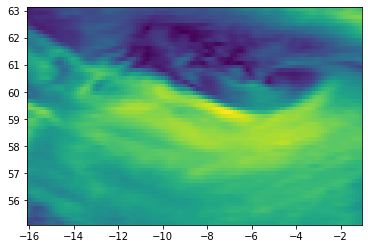

In [266]:
plt.pcolormesh(x_lonD[lon_ind1[0]:lon_ind2[0]], x_latD[lat_ind1[0]:lat_ind2[0]],swD)

<ipython-input-245-1e34d9fbaa52>:6: UserWarning: No contour levels were found within the data range.
  g = plt.contour(x_lonD[lon_ind1[0]:lon_ind2[0]], x_latD[lat_ind1[0]:lat_ind2[0]], caoD,


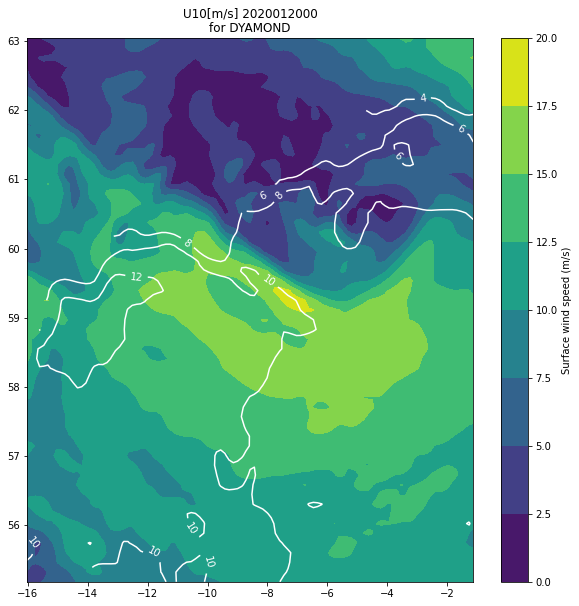

In [245]:
from matplotlib import cm
fig = plt.figure(figsize=(10,10))
scatter = plt.contourf(x_lonD[lon_ind1[0]:lon_ind2[0]], x_latD[lat_ind1[0]:lat_ind2[0]],swD)
f = plt.contour(x_lonD[lon_ind1[0]:lon_ind2[0]], x_latD[lat_ind1[0]:lat_ind2[0]], caoD,
                5,colors='white',levels=[0,2,4,6,8,10,12],linestyles='-')
g = plt.contour(x_lonD[lon_ind1[0]:lon_ind2[0]], x_latD[lat_ind1[0]:lat_ind2[0]], caoD,
                5,colors='white',levels=[-12,-8,-4],linestyles='--')
cbar = plt.colorbar(scatter)
cbar.ax.set_ylabel('Surface wind speed (m/s)')
plt.clabel(f, inline=True, fontsize=10)
plt.clabel(g, inline=True, fontsize=10)
plt.title('U10[m/s] 2020012000\nfor DYAMOND')
# plt.xticks(np.arange(-16, 0, step=2))
# plt.yticks(np.arange(55, 63, step=1))
plt.savefig('/glade/u/home/geethma/link/GCMres/U10_DYAMOND.png')

## whole globe CESM2

In [252]:
thetaD = np.multiply(t,((100/85)**con))
MD = np.subtract(sst,thetaD)

In [248]:
x_sfcWindD = np.sqrt(u**2 + v**2)

In [254]:
MDD = np.mean(np.mean(MD,axis=0),axis=2)

In [258]:
m_sfcWindD = np.mean(np.mean(x_sfcWindD,axis=0),axis=0)
np.shape(m_sfcWindD)

(1280, 2560)

Text(0.5, 1.0, 'U10[m/s] 2020012000\nfor DYAMOND')

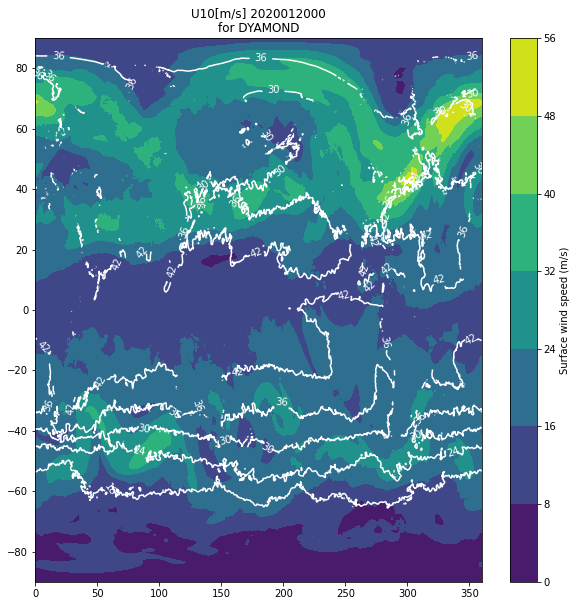

In [261]:
fig = plt.figure(figsize=(10,10))
scatter = plt.contourf(lon, lat,m_sfcWindD)
f = plt.contour(lon, lat, MDD,
                5,colors='white')
# g = plt.contour(lon, lat, MDD,
#                 5,colors='white',levels=[-12,-8,-4],linestyles='--')
cbar = plt.colorbar(scatter)
cbar.ax.set_ylabel('Surface wind speed (m/s)')
plt.clabel(f, inline=True, fontsize=10)
plt.clabel(g, inline=True, fontsize=10)
plt.title('U10[m/s] 2020012000\nfor DYAMOND')

<a list of 45 text.Text objects>

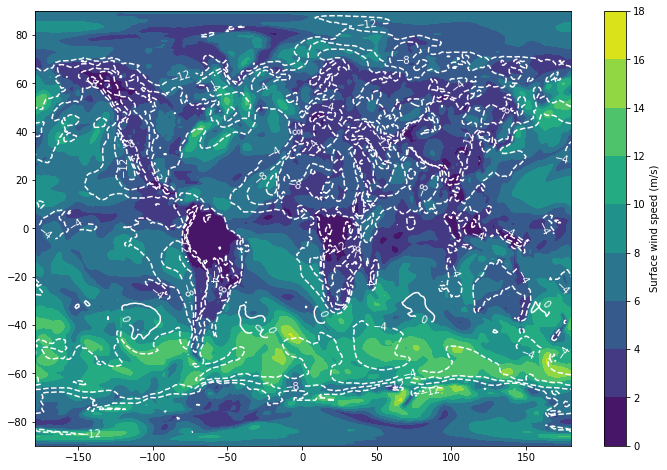

In [17]:
fig = plt.figure(figsize=(12,8))
scatter = plt.contourf(lon1, lat1,sfcWind1)
# f = plt.contour(lon1, lat1,M,5,colors='white',levels=[0,4,8,12],linestyles='-')
# g = plt.contour(lon1, lat1,M,5,colors='white',levels=[-12,-8,-4],linestyles='--')
cbar = plt.colorbar(scatter)
cbar.ax.set_ylabel('Surface wind speed (m/s)')
plt.clabel(f, inline=True, fontsize=10)
plt.clabel(g, inline=True, fontsize=10)

# IGNORE

In [ ]:
# M = M.reshape(-1)
# sfcWind1 = sfcWind1.reshape(-1)

In [ ]:
c = []
s = []
for i in range(len(M)):
    if np.isnan(M[i]*sfcWind1[i])==False:
        c.append(M[i])
        s.append(sfcWind1[i])

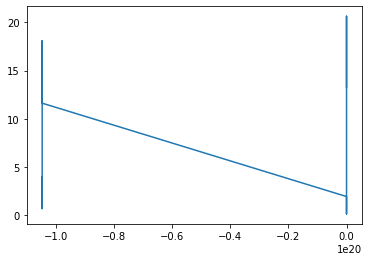

In [71]:
x = np.array(c)
y = np.array(s)
ind = np.argsort(x)
xx = np.sort(x)
yy = y[ind]
plt.plot(xx,yy)

In [78]:
from scipy import stats
bin_means, bin_edges, binnumber = stats.binned_statistic(c, s, 'mean', bins=2)
bin_width = (bin_edges[1] - bin_edges[0])
bin_centers = bin_edges[1:] - bin_width/2

<function matplotlib.pyplot.show(close=None, block=None)>

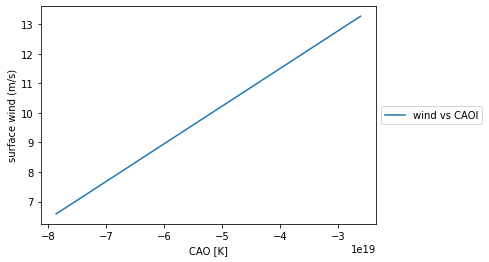

In [79]:
from skmisc.loess import loess
x = np.array(bin_centers[:])
y = np.array(bin_means[:])
ind = np.argsort(x)
xx = np.sort(x)
yy = y[ind]

# l = loess(xx,yy)
# l.fit()
# pred = l.predict(xx, stderror=True)
# conf = pred.confidence()

# lowess = pred.values
# ll = conf.lower
# ul = conf.upper

fig = plt.figure()
# print(lowess)
plt.plot(xx, yy, label='wind vs CAOI')
# plt.scatter(cao, sw, marker='o', label='MAC-LWP + MERRA2')

#     plt.hexbin(cao, sw, gridsize=(15,15), cmap=plt.cm.Purples_r )
plt.xlabel('CAO [K]')
plt.ylabel('surface wind (m/s)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show